<img src="https://drive.google.com/uc?id=1E_GYlzeV8zomWYNBpQk0i00XcZjhoy3S" width="100"/>

# DSGT Bootcamp Week 2: Exploratory Data Analysis

# Learning Objectives

1. Learn Pandas (data manipulation library)
2. Filter data using Pandas
3. Understand how to initially view a dataset
4. Introduction to statistical analysis and data visualization





# Accessing the Titanic Dataset

The `titanic_train.csv` file is already provided in this notebook, so you should be able to read the csv in easily exactly like Workshop 1

# Introduction to Pandas

Pandas is a data manipulation library. Let's import it so we can use its predefined functions and go through some basic commands


In [1]:
import pandas as pd #this imports pandas as pd to shorten function calls
print(pd.__version__)

2.2.2


In [2]:
%ls

'Workshop 2 Drill Spring 2022.ipynb'   titanic_train.csv
'Workshop 2 Spring 2022.ipynb'


In [3]:
%pwd

'/home/u0ffb3364e89b0a170bc2fe23407f010/In_Person/Workshop Two'

# Introduction to Dataframes
Pandas' core element is a dataframe -- effectively a faster version of a spreadsheet stored in memory.

Using dataframes, we can explore data rapidly and effectively with prebuilt functions.

Let's start by loading in a dataframe from the CSV file `titanic_train.csv` in the folder we moved to.

A CSV (comma-separated values) file is exactly what it sounds like. The Pandas dataframe lets us see what they look like in an appealing format.



In [4]:
df = pd.read_csv('titanic_train.csv')

So what is this dataframe df? 

In [5]:
df

/opt/intel/oneapi/intelpython/envs/pytorch-gpu/lib/python3.9/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/opt/intel/oneapi/intelpython/envs/pytorch-gpu/lib/python3.9/site-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/opt/intel/oneapi/intelpython/envs/pytorch-gpu/lib/python3.9/site-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


As shown above, there are 891 rows or data points and 12 columns or features that describe the data.

A feature is just an attribute of the data. It can be categorical/qualitative (ex: sex) or quantitative (ex: age).



# Data Preprocessing

Why do we need data preprocessing? Well, your data will rarely be perfecly usable right away. 

Potential issues include:

1) Flaws in the data itself (missing values, poor formatting, etc.)

2) Some data may be irrelevant or redundant

3) You may want to add multiple data sets together

In [6]:
minidf = df[['PassengerId','Sex', 'Age', 'SibSp', 'Parch']] #Isolate these features in the df
minidf = minidf[0:7] #look at the first seven rows for these features
minidf

/opt/intel/oneapi/intelpython/envs/pytorch-gpu/lib/python3.9/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/opt/intel/oneapi/intelpython/envs/pytorch-gpu/lib/python3.9/site-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/opt/intel/oneapi/intelpython/envs/pytorch-gpu/lib/python3.9/site-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Sex,Age,SibSp,Parch
0,1,male,22.0,1,0
1,2,female,38.0,1,0
2,3,female,26.0,0,0
3,4,female,35.0,1,0
4,5,male,35.0,0,0
5,6,male,NaN,0,0
6,7,male,54.0,0,0


Now, we have a smaller dataframe that is much easier to read, though with less data to analyze. This can be used to concentrate on certain features or locations within the set to potentially identify trends. 

## Data Filtering

We can isolate certain rows or columns by value using a few different techniques such as .where(), .loc, .iloc, and basic conditionals as can be seen in the snippet below

In [7]:
#Get all passengers that are male
males = df[df['Sex'] == 'male']
males

/opt/intel/oneapi/intelpython/envs/pytorch-gpu/lib/python3.9/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/opt/intel/oneapi/intelpython/envs/pytorch-gpu/lib/python3.9/site-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/opt/intel/oneapi/intelpython/envs/pytorch-gpu/lib/python3.9/site-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# What if I wanted everyone that did not survive? I think you should be able to figure it out
twenty_and_above = df[df['Survived'] == 0]
twenty_and_above

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## Removing rows/columns

Let's check if we are missing any values in our dataset with the `isnull().sum()` method. Note that Deepnote already provides this info when we load in the dataframe, but it is useful to know what is happening programmatically for your team project

In [ ]:
df.isnull().sum() #For every column, find the number of empty data points 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that the majority of our missing data is in the age and cabin columns, so let's drop those columns along with other features we don't care about.

In [ ]:
df = df.drop(['Cabin', 'Age', 'PassengerId', 'Ticket'], axis = 1)
df

,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,0,0,30.0000,C


Notice that this dataset does not include age or cabin anymore.

## Filling Empty Values

Now another problem you may encounter is empty values in your data. In this data, there are two blank entries in the "Embarked" feature. There are a few ways to deal with blank and invalid(Nan) entries. One option for numerical data would be to insert the entire column average into the missing data. However, since this is a categorical feature, it would be best to remove the entire data point with the missing value.

In [ ]:
df = df.dropna(axis = 0, how = 'any') #try instead of any, all
df
#df.isnull().sum()

,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,0,0,30.0000,C


There are a ton of other ways you can preprocess data! More advanced topics include data cleaning and transformation to remove outliers and standardize data and encoding categorical data into numerical values.

## Exporting Cleaned Data

Whenever you finish preprocessing your data, you need to export it as a new file so you can reference it later.

In [ ]:
#import library needed for file export
df.to_csv('cleanTitanic_train.csv')


In [ ]:
df = pd.read_csv('cleanTitanic_train.csv') #open the cleaned dataset to make sure it works
df

,Unnamed: 0,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked
0,0,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,S
1,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C
2,2,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S
3,3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,S
4,4,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
884,886,0,2,"Montvila, Rev. Juozas",male,0,0,13.0000,S
885,887,1,1,"Graham, Miss. Margaret Edith",female,0,0,30.0000,S
886,888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,23.4500,S
887,889,1,1,"Behr, Mr. Karl Howell",male,0,0,30.0000,C


## More Advanced Data Cleaning Tools

- Open Refine

- Trifacta

- R

- And obviously, Python

# Imports


In [2]:
%pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 10.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# Understanding Data Distributions (Normal Distribution)


Normal Distribution is by far the most important distribution when it comes to probability distribution in statistics because it mimics natural phenomena very well. Blood pressure, IQ, Height, Weight, etc. Normal Distribution is represented by a Gaussian curve which is shown in the graphic below. We usually want a dataset of at least thirty entries though the larger the better.

The graphic entails the following (This is just an example, other normal distributions follow similar pattern, but not exact numbers).

1.) If I have a value that is in between the mean +- one standard deviation, my value belongs in the group representing 68.27% of the population

2.) If I have a value that is in between the mean +- two standard deviation, my value belongs in the group representing 95.45% of the population

3.) If I have a value that is in between the mean +- three standard deviation, my value belongs in the group representing 99.73% of the population

<img src="https://miro.medium.com/max/1400/1*IZ2II2HYKeoMrdLU5jW6Dw.png" width=600px>

Now it's time to look at why this is important to us data scientists. As data scientists, we are to interpret the data given by our environment, so of course we want our data to be as unbiased as possible. We simply want to capture our environment and from there conduct our own analyses.

The following theorem helps us to better understand capturing data.



# Understanding Statistical Analysis (Central Limit Theorem)

The theorem states that the sample sum/average will approach a normal distribution as the sample size becomes large. There are mathematics to prove this, but this is as far as you need to know conceptually.

Example: This graphic depicts the probability distribution of rolling dice. As we roll more dices, we find the distribution of the sum to represent something closer to a normal distribution.

![image.png](https://prwatech.in/blog/wp-content/uploads/2019/06/CetralLimitThm-1024x512.png)

# Demonstration

It's time to take a look at this ourselves! We are going to be splitting up our data into smaller ascending groups and graphing each group out. As we begin to graph larger datasets, the graph distribution will mimic a normal distribution more.

In [ ]:
df = pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


I want to analyze the distribution of the age column. 

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

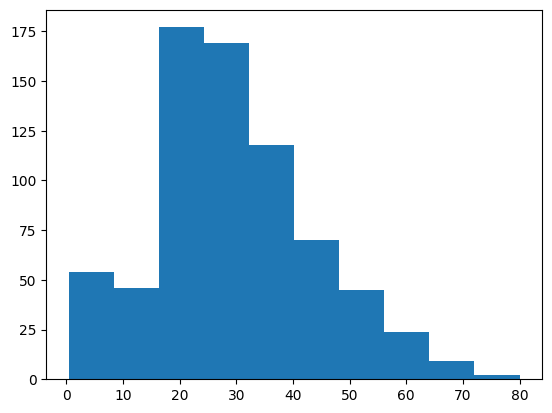

In [ ]:
plt.hist(df["Age"], bins = 10)

As we can see, the age does not follow a perfect normal distribution. But if we randomly take 10 people and take their averaged age. Repeat this for 2000 times, we can see that the averaged age looks like a normal distribution.

(array([  3.,   4.,   7.,  10.,   7.,  16.,  35.,  40.,  70.,  83., 122.,
        127., 140., 136., 145., 162., 171., 176., 131.,  86.,  93.,  62.,
         57.,  42.,  19.,  21.,  17.,   6.,   8.,   4.]),
 array([ 6.5       ,  7.62666667,  8.75333333,  9.88      , 11.00666667,
        12.13333333, 13.26      , 14.38666667, 15.51333333, 16.64      ,
        17.76666667, 18.89333333, 20.02      , 21.14666667, 22.27333333,
        23.4       , 24.52666667, 25.65333333, 26.78      , 27.90666667,
        29.03333333, 30.16      , 31.28666667, 32.41333333, 33.54      ,
        34.66666667, 35.79333333, 36.92      , 38.04666667, 39.17333333,
        40.3       ]),
 <BarContainer object of 30 artists>)

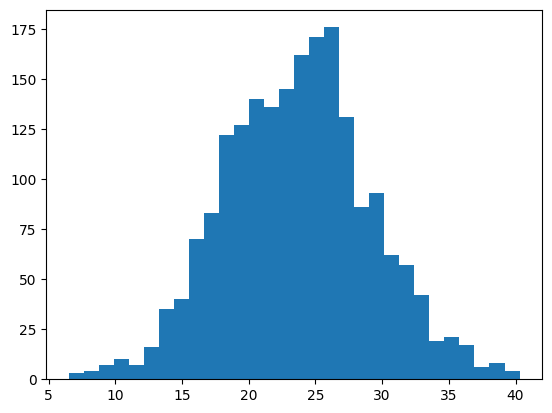

In [ ]:
average_ages = []
for i in range(2000):
  ave_age = df["Age"].sample(10).sum() / 10
  average_ages.append(ave_age)

plt.hist(average_ages, bins = 30)

# Data Visualization
## Tools:
- Pandas DataFrame
- Matplotlib (plt)
- Seaborn (sns)

As they say, a picture is worth a thousand words! It's time to visualize our data. 

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


This is all about us, the data scientist! We are curious and wish to see this data through front and back. Right now, I want to see the distribution of the priority class of the passengers here. Let me graph out that

**FYI:** You can also use Deepnote to visualize specific columns of your dataframe by clicking on the "Visualize" widget

<AxesSubplot: ylabel='Frequency'>

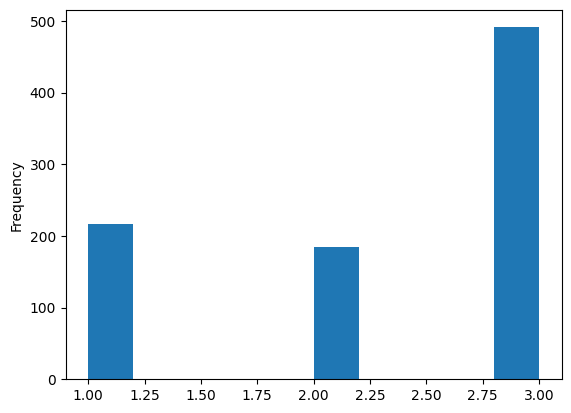

In [ ]:
df['Pclass'].plot(kind='hist')

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

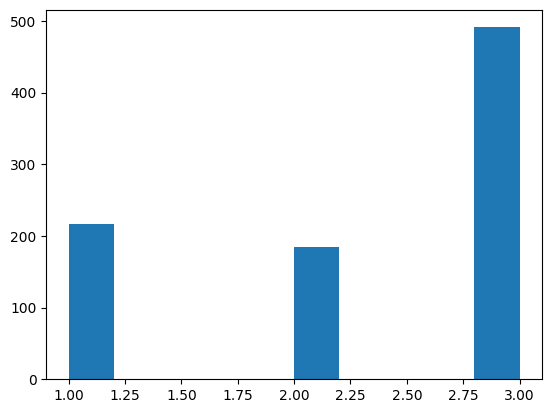

In [ ]:
plt.hist(df['Pclass'])

Text(0.5, 1.0, 'Histogram of Priority Class')

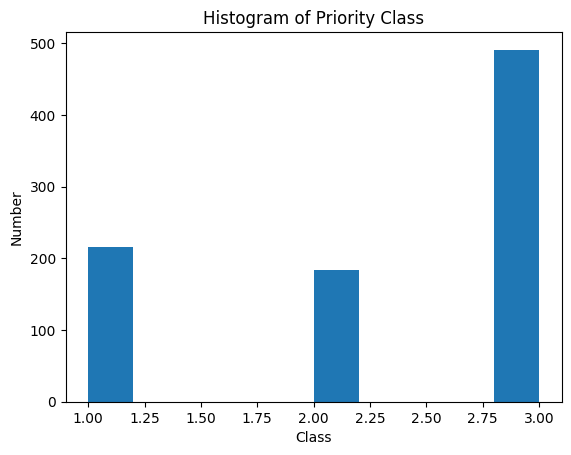

In [ ]:
plt.hist(df['Pclass'])
plt.xlabel("Class")
plt.ylabel("Number")
plt.title("Histogram of Priority Class")

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

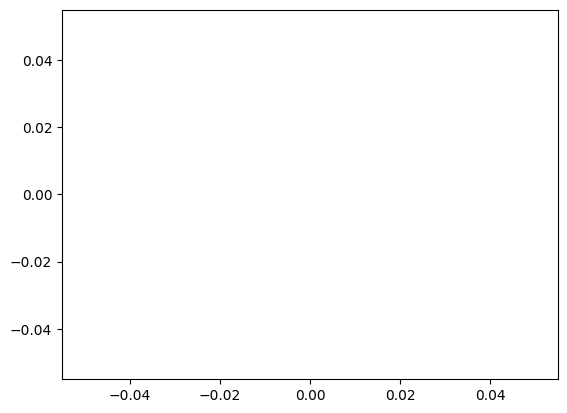

In [ ]:
sns.histplot(df['Pclass'])

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

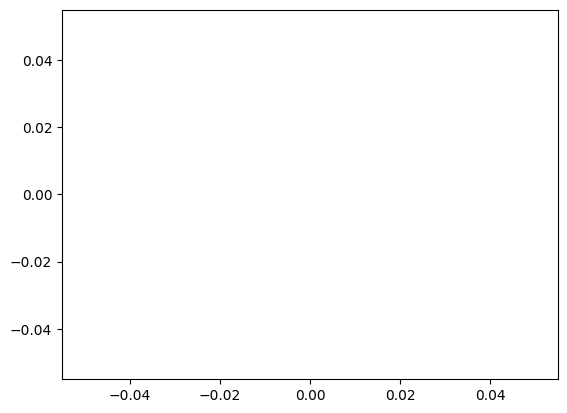

In [ ]:
sns.histplot(df['Pclass']).set(xlabel='Priority Class',ylabel='Number',title="Histogram of Priority Class")

I would like to graph the x axis using the English name of the priority class

In [ ]:
dictionary = {1:'First', 2:'Second', 3:'Third'}

In [ ]:
df["Priority"] = df['Pclass'].map(dictionary)
df[['Pclass', "Priority"]]

,Pclass,Priority
0,3,Third
1,1,First
2,3,Third
3,1,First
4,3,Third
...,...,...
886,2,Second
887,1,First
888,3,Third
889,1,First


<AxesSubplot: >

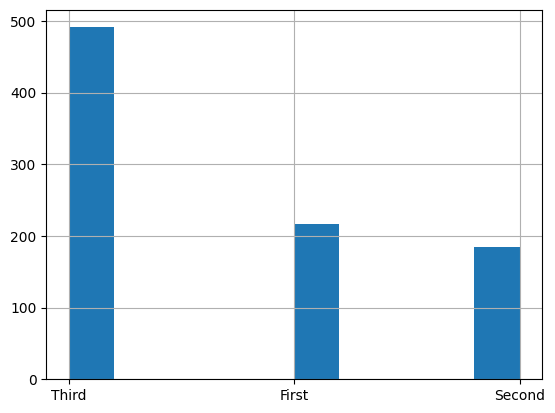

In [ ]:
df['Priority'].hist()

(array([491.,   0.,   0.,   0.,   0., 216.,   0.,   0.,   0., 184.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

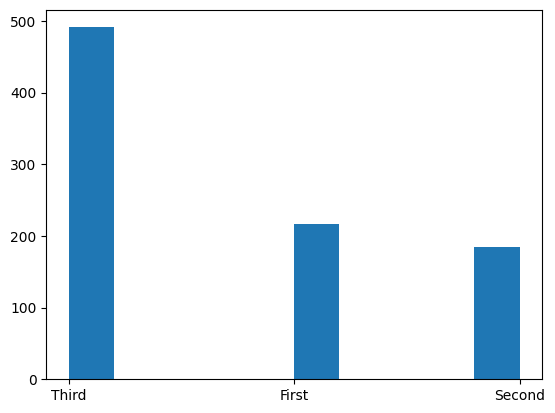

In [ ]:
plt.hist(df['Priority'])

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

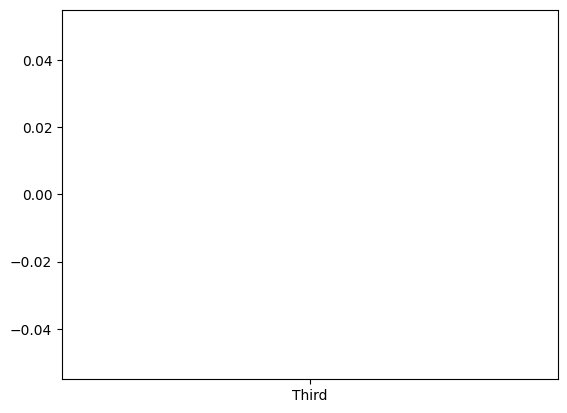

In [ ]:
sns.histplot(df,x='Priority')

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Priority', ylabel='count'>

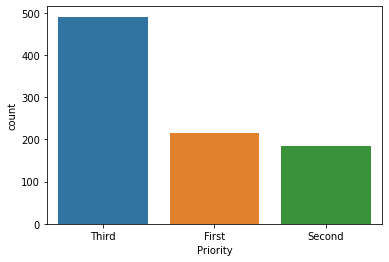

In [ ]:
sns.countplot(df["Priority"])

Now I wish to look at the distribution of age. We can use the histogram or distribution plot.

<AxesSubplot: ylabel='Frequency'>

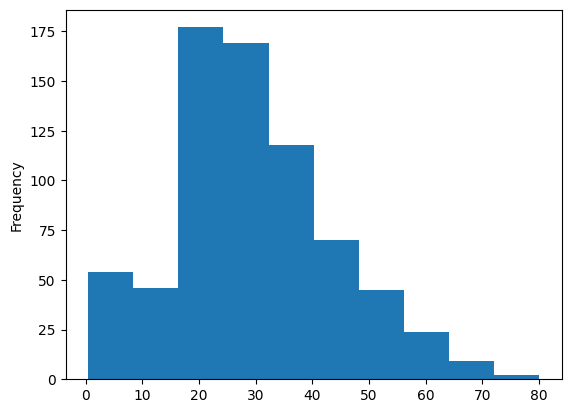

In [ ]:
df['Age'].dropna().plot(kind='hist')

(array([ 44.,  24.,  32., 104., 115., 127.,  80.,  59.,  49.,  30.,  22.,
         17.,   4.,   6.,   1.]),
 array([ 0.42      ,  5.72533333, 11.03066667, 16.336     , 21.64133333,
        26.94666667, 32.252     , 37.55733333, 42.86266667, 48.168     ,
        53.47333333, 58.77866667, 64.084     , 69.38933333, 74.69466667,
        80.        ]),
 <BarContainer object of 15 artists>)

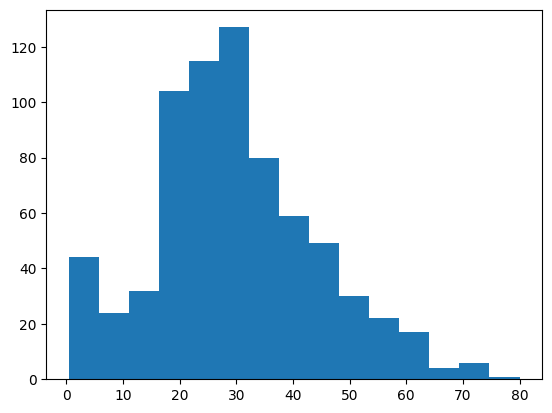

In [ ]:
plt.hist(df['Age'].dropna(), bins = 15)

<AxesSubplot:xlabel='Age', ylabel='Count'>

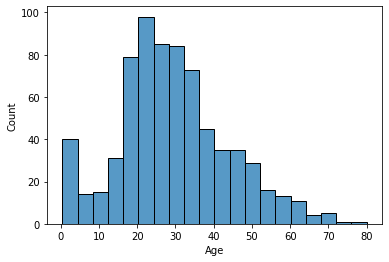

In [ ]:
sns.histplot(data = df, x = "Age")

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


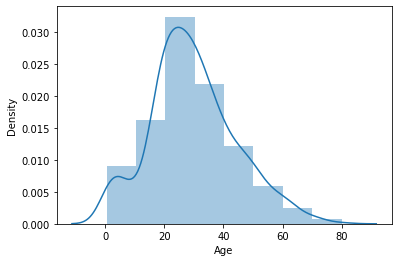

In [ ]:
# histogram and density curve
plot = sns.distplot(df['Age'].dropna(),bins=8)
# plot.set(xlim=(0,80))

I currently have a theory. It seems to me that people of a higher priority class should have an equal rate of survival as people in lower classes because money should not buy an individual anything at the expense of others. I'm going to visualize this for myself and look at the number of people who live and die based on their priority class.

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Priority
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Third
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,First
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Third
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,First
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Third
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Second
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,First
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Third
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,First


<AxesSubplot:xlabel='Priority', ylabel='count'>

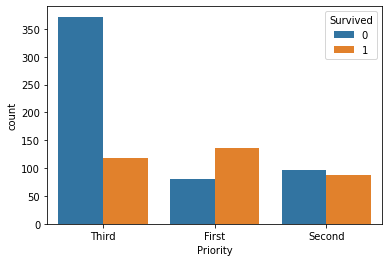

In [ ]:
sns.countplot(data=df,x='Priority',hue='Survived')

Looks like I was definitely wrong. However, it was very fruitful to have the data prove this to me.